# Week 7 handin

## Assignment
### Ex1 
With websraping go to DR.dk, and find all headlines containing the word or name of your choice. For example: "Mette", Vaccine", "Corona" and so on. Try to choose something popular/current, to be sure to get results/headlines. When printing the list of headlines, try also to print the amount of headlines in the list.
### Ex2 
Pick 3 words from the text you get from exercise 1.
Use "Regular Expressions" to find whichever words you choice and show how many times they occur in the text with a bar plot.
### Ex3 
Use selenium for this exercise.
Use one of the 3 words as a search keyword and use google.com With that keyword.
and then get the first link from that search.

## Status
Hvis ex2 fejler, skal word1, word2 og word3 tilrettes, så de indeholder et ord, som printes i ex1.

## Exercises

### Ex1

In [7]:
import matplotlib.pyplot as plt
import bs4
import requests
import urllib.request
import re

url = "https://www.dr.dk/"
rUrl = requests.get(url)
rUrl.raise_for_status()

beauti = bs4.BeautifulSoup(rUrl.text, 'html.parser')

listHeadlines = []
listWithVaccine = []

headlines = beauti.findAll('a')
for headline in headlines:
    listHeadlines.append(headline.getText())

for headline in headlines:
    if ('vaccine' in headline.getText()):
        listWithVaccine.append(headline.getText())
        
print(listWithVaccine, len(listWithVaccine))

['Ugens coronatal forklaret: Kan vi stole på, at alle har fået vacciner til august?', 'Ugens coronatal forklaret: Kan vi stole på, at alle har fået vacciner til august?', 'Slutdato for vacciner er rykket til 22. august: Se din vaccinationstid her', 'Se vaccinen blive rullet ud: Så langt er Danmark og resten af verden'] 4


### Ex2

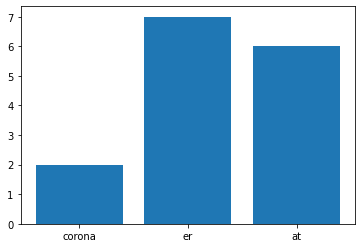

In [15]:
word1 = re.compile('corona')
word2 = re.compile('er')
word3 = re.compile('at')

word1_find = word1.search(str(listWithVaccine))
word2_find = word2.search(str(listWithVaccine))
word3_find = word3.search(str(listWithVaccine))

all_word1 = word1.findall(str(listWithVaccine))
all_word2 = word2.findall(str(listWithVaccine))
all_word3 = word3.findall(str(listWithVaccine))

listOfNames = [word1_find.group(0), word2_find.group(0), word3_find.group(0)]
listOfTimes = [len(all_word1), len(all_word2), len(all_word3)]

plt.bar(listOfNames,listOfTimes)
plt.show()

### Ex3

In [11]:
from selenium.webdriver.firefox.options import Options
from selenium import webdriver

urlSelenium = 'https://www.google.com/'

options = Options()
options.headless = True

browser = webdriver.Firefox(options = options)
browser.get(urlSelenium)
browser.implicitly_wait(3)

searchBar = browser.find_element_by_name('q')
searchBar.send_keys('Corona')
searchBar.submit()

link = browser.find_element_by_xpath('//a[@href="https://www.sst.dk/da/corona"]')

the_link = link.get_attribute("href")
print(the_link)

https://www.sst.dk/da/corona
